In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\Manaswini\Downloads\projects.zip')
print("Original dataset shape:", df.shape)
df.head()

Original dataset shape: (211225, 31)


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
crisis_emotions = [
    'sadness', 'nervousness', 'anger', 'fear',
    'remorse', 'disappointment', 'embarrassment',
    'grief', 'confusion'
]
crisis_df = df[df[crisis_emotions].sum(axis=1) > 0]
normal_df = df[df[crisis_emotions].sum(axis=1) == 0]
normal_df = normal_df.sample(n=len(crisis_df), random_state=42)

crisis_df.to_csv('goemotions_crisis.csv', index=False)
normal_df.to_csv('goemotions_normal.csv', index=False)

print(f"Crisis rows: {len(crisis_df)}")
print(f"Normal rows: {len(normal_df)} (sampled)")

Crisis rows: 37572
Normal rows: 37572 (sampled)


In [7]:
crisis_df = pd.read_csv('goemotions_crisis.csv')   
normal_df = pd.read_csv('goemotions_normal.csv')    

crisis_df['label'] = 1
normal_df['label'] = 0

crisis_df = crisis_df[['text', 'label']]
normal_df = normal_df[['text', 'label']]

final_df = pd.concat([crisis_df, normal_df], ignore_index=True)
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

final_df.to_csv('mental_health_crisis_dataset.csv', index=False)

print("✅ Dataset saved to: mental_health_crisis_dataset.csv")


✅ Dataset saved to: mental_health_crisis_dataset.csv


In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
import random


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manaswini\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Manaswini\AppData\Roaming\nltk_data...


Dataset shape: (75144, 2)

Null values:
 text     0
label    0
dtype: int64

Label Distribution:
 label
0    37572
1    37572
Name: count, dtype: int64


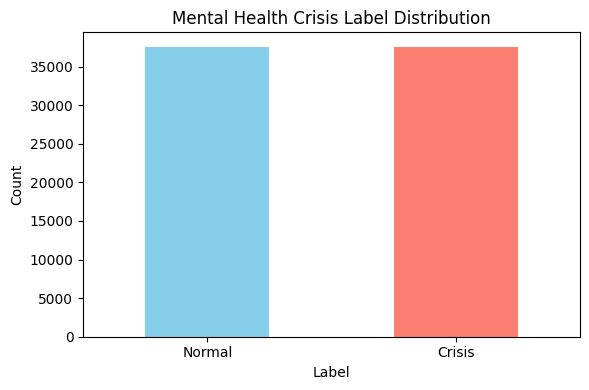

In [23]:
import matplotlib.pyplot as plt

df = pd.read_csv('mental_health_crisis_dataset.csv')
print("Dataset shape:", df.shape)

print("\nNull values:\n", df.isnull().sum())

label_counts = df['label'].value_counts()
print("\nLabel Distribution:\n", label_counts)
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Normal', 'Crisis'], rotation=0)
plt.title('Mental Health Crisis Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

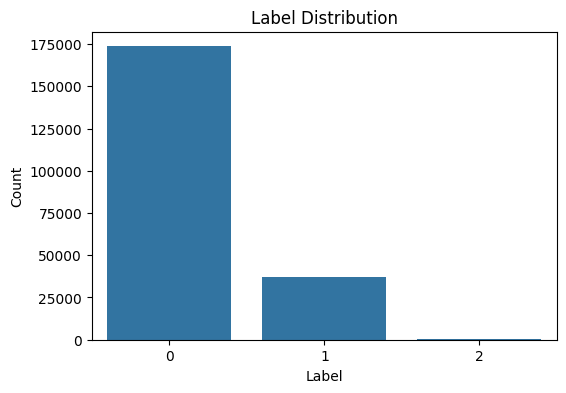

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

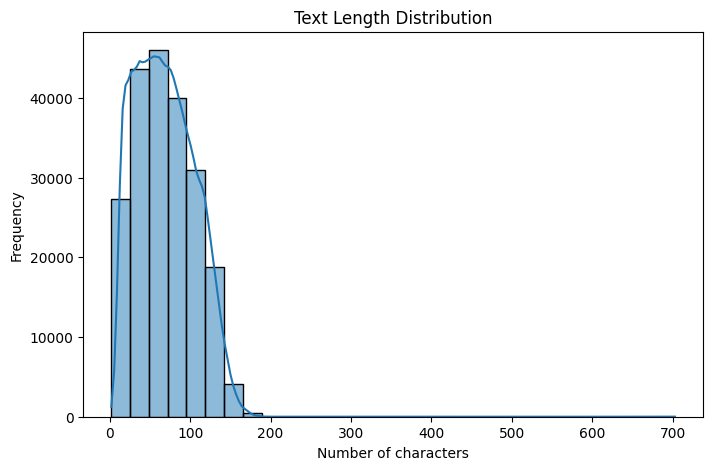

In [17]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()


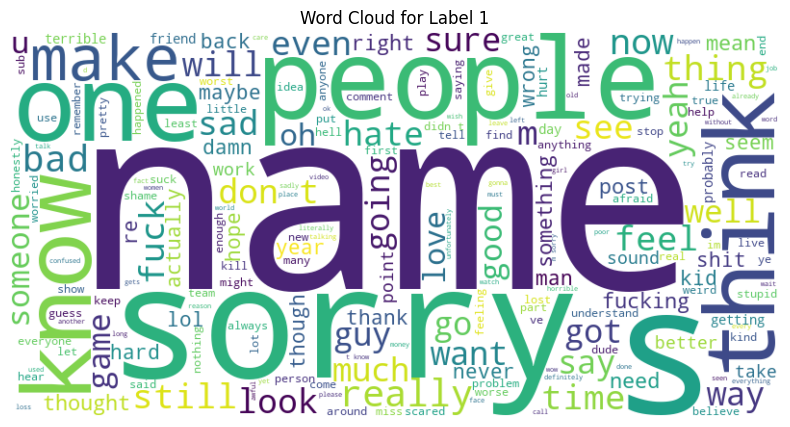

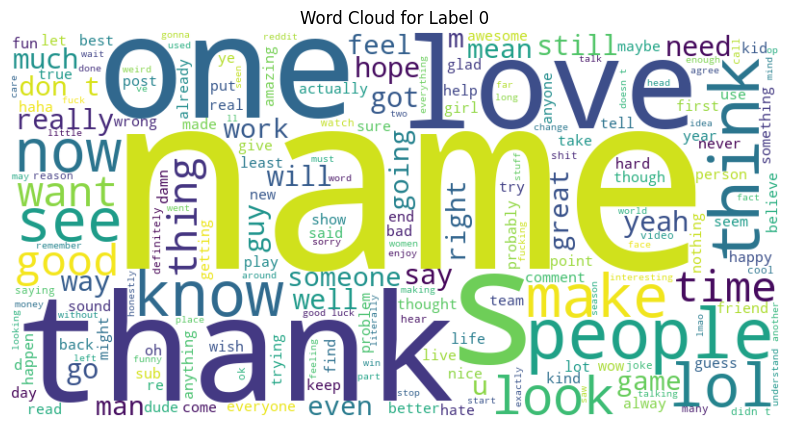

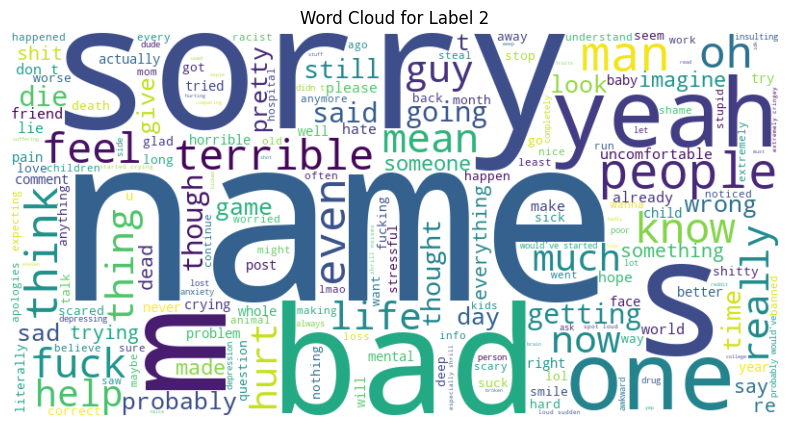

In [19]:
from wordcloud import WordCloud

for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Label {label}")
    plt.show()


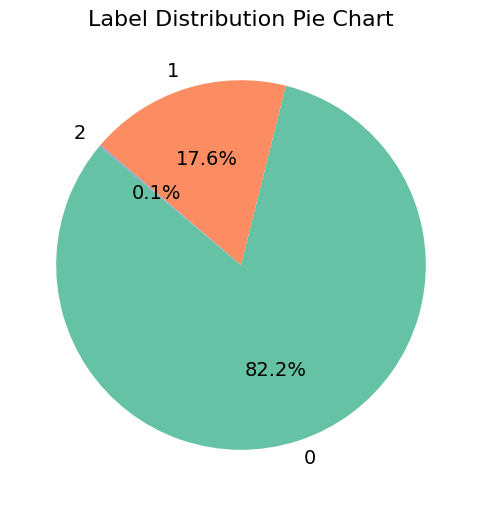

In [20]:
label_counts = df['label'].value_counts()
colors = sns.color_palette('Set2', n_colors=len(label_counts))

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Label Distribution Pie Chart', fontsize=16)
plt.show()


In [24]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manaswini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manaswini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(final_df['text'])

In [30]:
y = final_df['label']

In [39]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset

C:\Users\Manaswini\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    final_df['text'].tolist(), final_df['label'].tolist(), test_size=0.2, random_state=42)

In [41]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

C:\Users\Manaswini\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Manaswini\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [42]:
class MentalHealthDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_encodings, train_labels)
test_dataset = MentalHealthDataset(test_encodings, test_labels)

In [43]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
from transformers import TrainingArguments

In [52]:
import accelerate
print(accelerate.__version__)

1.9.0


In [ ]:
trainer.train()

In [ ]:
eval_result = trainer.evaluate()
print(eval_result)

In [54]:
from transformers import AutoModelForSequenceClassification

def model_init():
    return AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)


In [ ]:
best_trial = trainer.hyperparameter_search(
    direction="maximize",  # or "minimize" depending on your metric
    n_trials=10,           # adjust as needed
    hp_space=lambda trial: {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 5),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.3),
    }
)


In [4]:
crisis_emotions = [
    'sadness', 'nervousness', 'anger', 'fear', 'remorse',
    'disappointment', 'embarrassment', 'grief', 'confusion'
]

df['crisis_score'] = df[crisis_emotions].sum(axis=1)

def map_severity(score):
    if score == 0:
        return 0
    elif score <= 2:
        return 1
    else:
        return 2

df['label'] = df['crisis_score'].apply(map_severity)

In [5]:
df['text'] = df['text'].astype(str).str.lower()

print(df['label'].value_counts())
df[['text', 'label']].head()

label
0    173653
1     37261
2       311
Name: count, dtype: int64


,text,label
0,that game hurt.,1
1,>sexuality shouldn’t be a grouping category i...,0
2,"you do right, if you don't care then fuck 'em!",0
3,man i love reddit.,0
4,"[name] was nowhere near them, he was by the fa...",0


In [6]:
from transformers import DistilBertTokenizer
from sklearn.model_selection import train_test_split

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

C:\Users\Manaswini\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import torch
class CrisisDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = CrisisDataset(train_encodings, train_labels)
test_dataset = CrisisDataset(test_encodings, test_labels)

In [8]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, get_scheduler
from sklearn.metrics import accuracy_score
from tqdm import tqdm

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 3
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

loss_fn = torch.nn.CrossEntropyLoss()

epochs = 3
progress_bar = tqdm(range(num_training_steps))

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()
        progress_bar.update(1)

    avg_loss = total_loss / len(train_loader)

    model.eval()
    preds, labels_list = [], []
    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=-1).cpu().numpy())
            labels_list.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(labels_list, preds)
    print(f"Epoch {epoch+1} | Loss: {avg_loss:.4f} | Val Acc: {acc:.4f}")

print("✅ Training complete! Save model if happy with performance.")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 33%|████████████████████████▋                                                 | 10561/31686 [47:57<1:09:30,  5.07it/s]

Epoch 1 | Loss: 0.3770 | Val Acc: 0.8450


 67%|█████████████████████████████████████████████████▎                        | 21123/31686 [1:24:39<35:57,  4.90it/s]

Epoch 2 | Loss: 0.3371 | Val Acc: 0.8477


100%|█████████████████████████████████████████████████████████████████████████▉| 31685/31686 [2:01:05<00:00,  5.06it/s]

Epoch 3 | Loss: 0.2964 | Val Acc: 0.8409
✅ Training complete! Save model if happy with performance.


In [14]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def predict(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred_class_id = torch.argmax(logits, dim=-1).item()
    return pred_class_id

test_text = "life sucks i want to die"
predicted_label = predict(test_text)
print(f"Predicted class label: {predicted_label}")

Predicted class label: 1


In [10]:
save_directory = r"C:\Users\Manaswini\Downloads\saved_model"

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")


Model and tokenizer saved to C:\Users\Manaswini\Downloads\saved_model
